
# Image Processing – Lab 1: Introduction to digital images 

Luca Calatroni, office 226

luca.calatroni@unige.it


This notebook contains some illustrative exercises for the Digital Signal & Image Processing (DSIP) on the following topics:

- Part 1 – Exploring images: greyscale, RGB
- Part 2 – Histograms and point-wise transforms
- Part 3 – Neighbourhood operators
- Part 4 – Geometric transformations
- Part 5 – Histogram matching (mini‑project style: optional, for exam only)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage import data, color

## Part 1 – Exploring Images

### 1.1 Load example images
Load some exemplar images from skimage and print their size and type.

In [3]:
# Load grayscale and color images from skimage.data
gray_img = data.camera()        # 2D grayscale
color_img = data.astronaut()    # 3D RGB

print("gray_img type:", type(gray_img))
print("gray_img shape:", gray_img.shape)
print("gray_img dtype:", gray_img.dtype)

print("color_img type:", type(color_img))
print("color_img shape:", color_img.shape)
print("color_img dtype:", color_img.dtype)

gray_img type: <class 'numpy.ndarray'>
gray_img shape: (512, 512)
gray_img dtype: uint8
color_img type: <class 'numpy.ndarray'>
color_img shape: (512, 512, 3)
color_img dtype: uint8


### 1.2 Visualize the images
Show both images, adding a colormap for the greyscale one. Note that this option shows the dynamic range (values between minimum, maximum values) of the image considered. For plotting images in a specific range you have force it.

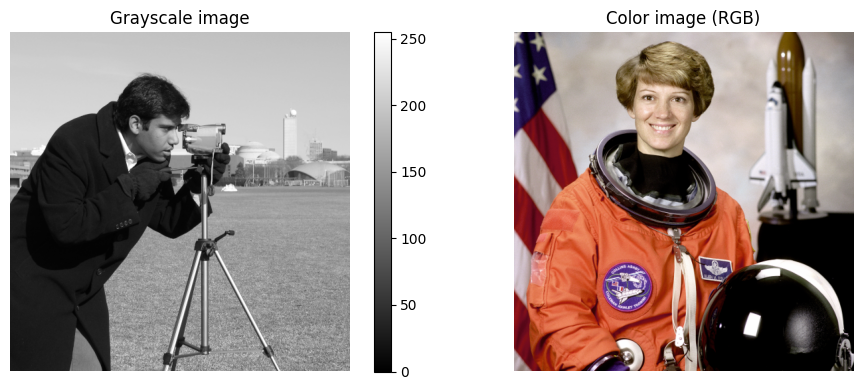

In [4]:
# display gray_img and color_img side by side
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
# plt.imshow(gray_img, cmap='gray', vmin=0, vmax=10) ----> to force display in range [0,10]--> no clipping, just visualisation
plt.colorbar()
plt.title("Grayscale image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(color_img)
plt.title("Color image (RGB)")
plt.axis('off')

plt.tight_layout()


### 1.3 Inspecting channels

Extract the three channels of the color image:

- build three 2D arrays `R`, `G`, `B` from `color_img`,
- print their shapes,
- visualize each channel as a grayscale image.


In [5]:

# TODO: extract the three channels from color_img
# R = ...
# G = ...
# B = ...

# TODO: print the shapes of the channels
# print("R shape:", ...)
# print("G shape:", ...)
# print("B shape:", ...)

# TODO: visualize the three channels
# plt.figure(figsize=(12,4))
# plt.subplot(1,3,1); plt.imshow(R, cmap='gray'); plt.title("R"); plt.axis('off')
# plt.subplot(1,3,2); plt.imshow(G, cmap='gray'); plt.title("G"); plt.axis('off')
# plt.subplot(1,3,3); plt.imshow(B, cmap='gray'); plt.title("B"); plt.axis('off')
# plt.tight_layout()



### 1.4 Grayscale conversion

Implement two different grayscale conversions:

- **weighted luminance** using

$$
  g = 0.299 R + 0.587 G + 0.114 B, 
$$  


- **simple average** using

$$
g = \frac{R + G + B}{3}
$$

Then compare the resulting grayscale images.


In [6]:

from matplotlib.pyplot import gray

# TODO: implement weighted grayscale conversion
def rgb_to_gray_weighted(img_rgb):
    """Convert an RGB uint8 image to grayscale using luminance weights."""
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]
    # TODO: combine R, G, B with weights 0.299, 0.587, 0.114
    gray = ...
    return gray

# TODO: implement grayscale conversion via simple average of channels
def rgb_to_gray_average(img_rgb):
    """Convert an RGB uint8 image to grayscale using simple average."""
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]
    # TODO: compute the average of the three channels
    gray = ...
    return gray

# TODO: compute both grayscale versions of color_img
# my_gray = rgb_to_gray_weighted(color_img)
# my_gray2 = rgb_to_gray_average(color_img)

# TODO: display and compare the two grayscale images
# plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.imshow(my_gray, cmap='gray'); plt.colorbar(); plt.title("Weighted grayscale"); plt.axis('off')
# plt.subplot(1,2,2)
# plt.imshow(my_gray2, cmap='gray'); plt.colorbar(); plt.title("Average grayscale"); plt.axis('off')
# plt.tight_layout()


## Part 2 – Histograms and Point-wise Transforms


### 2.1 Histogram of a grayscale image

Use `numpy.histogram` to study how the histogram depends on:

- the **number of bins**;
- the **intensity range** used.

Start by reproducing the example below, then try different values
and comment the differences.


Text(0, 0.5, 'Count')

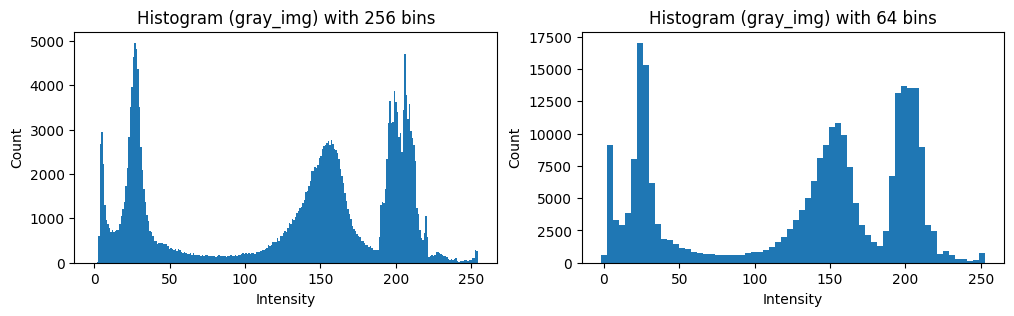

In [7]:
# compute and plot histograms of the gray image using different bins
bins = 256
bins2 = 64

hist, bin_edges = np.histogram(gray_img.ravel(), bins=bins)
hist2, bin_edges2 = np.histogram(gray_img.ravel(), bins=bins2)


plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0])  # the first command creates bars at the left edges of the bins, so we use bin_edges[:-1]
plt.title("Histogram (gray_img) with 256 bins")
plt.xlabel("Intensity")
plt.ylabel("Count")


plt.subplot(1,2,2)
plt.bar(bin_edges2[:-1], hist2, width=bin_edges2[1]-bin_edges2[0])
plt.title("Histogram (gray_img) with 64 bins")
plt.xlabel("Intensity")
plt.ylabel("Count")



Now repeat the experiment with:

- different numbers of bins (e.g. 32, 128, ...),
- different ranges (e.g. focusing only on darker or brighter intensities).

Comment the differences you observe in the shape of the histogram.


In [8]:

# TODO: experiment with different numbers of bins and ranges
# bins3 = ...
# hist3, edges3 = np.histogram(my_gray.ravel(), bins=bins3, range=(... , ...))
# plt.figure(...)
# plt.bar(...)



### 2.2 Gamma correction
Let us apply a very simple point-wise correction now. Fix values of $\gamma$ and compute the $\gamma$-corrected version of the greyscale image above.

In [9]:

# Gamma correction function
def gamma_correction(img, gamma):
    corrected = img ** gamma
    return corrected

gammas = [0.5, 1.0, 2.0]

plt.figure(figsize=(12,4))
for i, g in enumerate(gammas):
    out = gamma_correction(my_gray, g)
    plt.subplot(1,len(gammas),i+1)
    plt.imshow(out, cmap='gray')
    plt.title(f"gamma = {g}")
    plt.axis('off')

plt.tight_layout()


NameError: name 'my_gray' is not defined

<Figure size 1200x400 with 0 Axes>


### 2.3 Gamma correction of only one color channel

Using the function `gamma_correction` defined above, apply a fixed
gamma value to **only one channel at a time** of the color image:

- first to the red channel (keeping G and B unchanged),
- then to the green channel,
- then to the blue channel.

Display the resulting three colour images and comment the effect.


In [ ]:

gamma = 2  # choose your gamma

# TODO: apply gamma_correction to each channel separately
# R_gamma = ...
# G_gamma = ...
# B_gamma = ...

# TODO: rebuild three RGB images where only one channel is gamma-corrected
# img_R = ...
# img_G = ...
# img_B = ...

# TODO: visualize the results
# plt.figure(figsize=(12,6))
# plt.subplot(2,2,1); plt.imshow(color_img); plt.title("Original"); plt.axis("off")
# plt.subplot(2,2,2); plt.imshow(img_R); plt.title(f"Gamma {gamma} on R only"); plt.axis("off")
# plt.subplot(2,2,3); plt.imshow(img_G); plt.title(f"Gamma {gamma} on G only"); plt.axis("off")
# plt.subplot(2,2,4); plt.imshow(img_B); plt.title(f"Gamma {gamma} on B only"); plt.axis("off")
# plt.tight_layout()



### 2.4 Contrast stretching

The greyscale image considered is in the range $[0,255]$.
Define a **logarithmic contrast stretching** function with a fixed parameter $c$,
apply it to the image, and compare the results.


In [ ]:

def contrast_stretch(img, c):
    """Logarithmic contrast stretching.
    Hint:
    - shift intensities so that the argument of the logarithm is positive,
    - apply a mapping of the form  c * log( ... ).
    """
    # TODO: implement logarithmic contrast stretching
    # img_shifted = ...
    # img_log = ...
    return img_log

# TODO: apply your contrast stretch to my_gray with a chosen constant c
# stretched = contrast_stretch(my_gray, c=25)

# TODO: compare images showing them in a common range to see differences
# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# plt.imshow(my_gray, cmap='gray', vmin=0, vmax=255)
# plt.colorbar(); plt.title("Original grayscale"); plt.axis('off')
# plt.subplot(1,2,2)
# plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)
# plt.colorbar(); plt.title("Logarithmic contrast stretched"); plt.axis('off')
# plt.tight_layout()


Plot the histograms and the CDFs of the original/stretched images. What do you observe?

In [ ]:

# --- Compute histograms and CDFs for original and stretched images ---

# TODO: choose a number of bins, e.g. 256
# bins = ...

# TODO: compute histograms using np.histogram
# hist_orig, edges_orig = ...
# hist_str,  edges_str  = ...

# TODO: compute CDFs from histograms, using cumsum function 
# cdf_orig = np.cumsum(hist_orig)/.....
# cdf_str  = ...

# TODO: compute bin centers
# centers_orig = 0.5 * (edges_orig[:-1] + edges_orig[1:])   # ---> here, we compute the bin centers as the average of the left and right edges of each bin
# centers_str  = 0.5 * (edges_str[:-1] + edges_str[1:])

# TODO: plot histograms and CDFs in a 2x2 figure
# (original vs stretched)

# TODO: also plot the equalization mapping T(r) = (L-1) * CDF(r) for the original image
# L = 256
# plt.figure(...)
# plt.plot(centers_orig, (L-1)*cdf_orig)


## Part 4 – Geometric Transformations
We consider now geometric transformations where the function modifies first the position of pixels on a grid and then re-assign intensity values.

### 4.1 Scaling with nearest neighbour (inverse mapping)

In [ ]:

def scale_nn(img, sx, sy):
    """Nearest-neighbour scaling with inverse mapping."""
    if img.ndim == 2:
        # grayscale case
        h, w = img.shape
        out_h, out_w = int(sy*h), int(sx*w)
        out = np.zeros((out_h, out_w), dtype=img.dtype)
        for v in range(out_h):
            for u in range(out_w):
                # TODO: map output (u,v) back to input (x,y)
                # x = ...
                # y = ...
                # TODO: nearest neighbour interpolation (integer coordinates)
                # ix = ...
                # iy = ...
                if 0 <= ix < w and 0 <= iy < h:
                     out[v, u] = img[iy, ix]
                pass
        return out

# Example: use nearest neighbour scaling on the color image
small = scale_nn(color_img, 0.1, 0.1)
big   = scale_nn(color_img, 3, 3)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(color_img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(small)
plt.title("Downscaled (x0.1)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(big)
plt.title("Upscaled (x3)")
plt.axis('off')

plt.tight_layout()


### 4.2 Scaling with bilinear interpolation 
Compare the example above with the interpolation obtained by using bilinear interpolation.

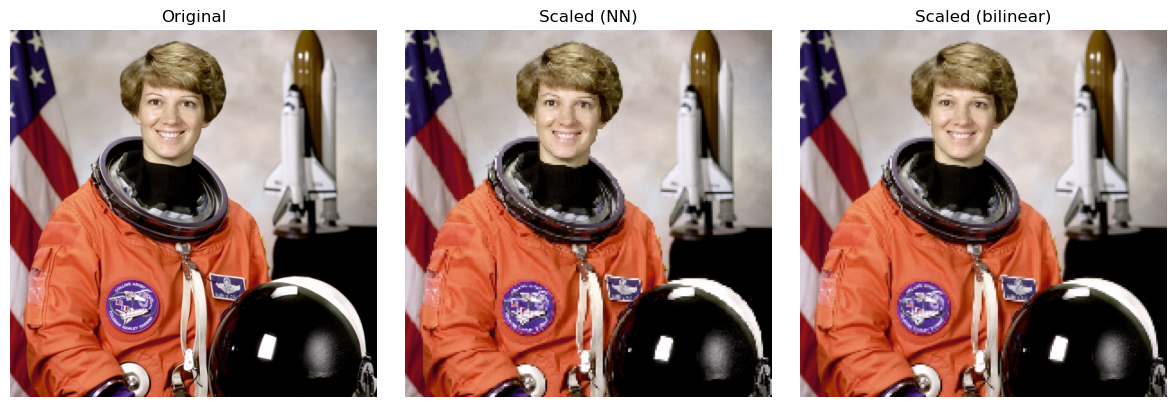

In [ ]:

def scale_bilinear(img, sx, sy):
    """Bilinear interpolation scaling with inverse mapping (grayscale only)."""
    if img.ndim != 2:
        raise ValueError("Use a grayscale image for this exercise.")
    h, w = img.shape
    out_h, out_w = int(sy*h), int(sx*w)
    out = np.zeros((out_h, out_w), dtype=img.dtype)

    for v in range(out_h):
        for u in range(out_w):
            # map output (u,v) back to input (x,y)
            x = u / sx
            y = v / sy

            x0 = int(np.floor(x))
            x1 = x0 + 1
            y0 = int(np.floor(y))
            y1 = y0 + 1

            if x0 < 0 or x1 >= w or y0 < 0 or y1 >= h:
                continue

            # TODO: define dx, dy (increment in x and y directions)
            # dx = ...
            # dy = ...

            # TODO: get neighbouring pixels Ia, Ib, Ic, Id
            # Ia = ...
            # Ib = ...
            # Ic = ...
            # Id = ...

            # TODO: bilinear interpolation formula
            # val = ...
            out[v, u] = val

    return out

# Example: compare nearest-neighbour vs bilinear scaling on the color image (using its grayscale version)
gray_for_scale = rgb_to_gray_weighted(color_img)

sx, sy = 1.8, 1.8
img_nn = scale_nn(gray_for_scale, sx, sy)
img_bl = scale_bilinear(gray_for_scale, sx, sy)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(gray_for_scale, cmap='gray')
plt.title("Original gray")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_nn, cmap='gray')
plt.title("Scaled (NN)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_bl, cmap='gray')
plt.title("Scaled (bilinear)")
plt.axis('off')

plt.tight_layout()


### 4.3 Rotation around the image centre (nearest neighbour)
Let us see together how to perform the geometrical transformation of rotation of an image round its centre.

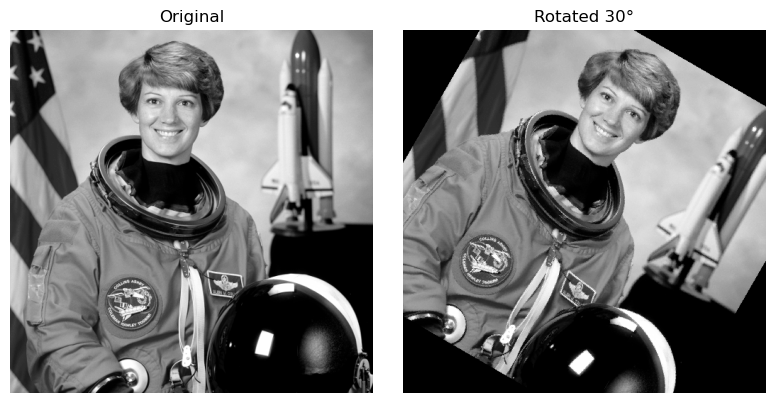

In [ ]:

def rotate_nn(img, angle):
    """Rotate a grayscale image by 'angle' radians around its centre (nearest neighbour)."""
    h, w = img.shape
    out = np.zeros_like(img)
    cx, cy = w / 2.0, h / 2.0   # center of the image
    cos_a = math.cos(angle)
    sin_a = math.sin(angle)
    for v in range(h):
        for u in range(w):
            x = u - cx
            y = v - cy
            # inverse rotation
            x0 =  cos_a * x + sin_a * y
            y0 = -sin_a * x + cos_a * y
            x_in = x0 + cx
            y_in = y0 + cy
            ix = int(round(x_in))
            iy = int(round(y_in))
            if 0 <= ix < w and 0 <= iy < h:
                out[v, u] = img[iy, ix]
    return out

rot = rotate_nn(my_gray, angle=math.radians(30))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(my_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rot, cmap='gray')
plt.title("Rotated 30°")
plt.axis('off')

plt.tight_layout()


## Project – Histogram Matching (optional, for exam only)


You should now implement **histogram matching** between two grayscale images using the
theoretical idea from the lectures:

1. Compute the CDF of the source image.
2. Compute the CDF of the target image.
3. Build a mapping using $z_k = C_{source}^{-1}(C_{in}(r_k))$.
4. Apply this mapping to all pixels of the source image.
5. Verify that the CDF of the target image and the transformed source image using the transofrmation defined match


Define at first the function computing all you need from an image (histogram, bin edges, cdf) given a number of bins.

In [ ]:

# TODO: define a function that, given a grayscale image,
# computes histogram, bin edges, PDF, and CDF.
# You may reuse np.histogram as in previous parts.


### 5.2 Histogram matching between two images
Define a function performing matching: compute the two CDFs fromt two two source/reference images, the corresponding bin centers and then define a suitable interpolation function assigning at each bin in the target a suitable intensity value. Once such mapping is defined apply it to each source pixel according to its bin.

In [ ]:

# TODO: implement histogram matching using CDFs:
# 1. compute histogram/CDF for source and reference images;
# 2. build a mapping based on z_k = C_target^{-1}(C_source(r_k));
# 3. apply this mapping to all pixels of the source image.


### 5.3 Example: matching `camera` to `astronaut` (grayscale versions)

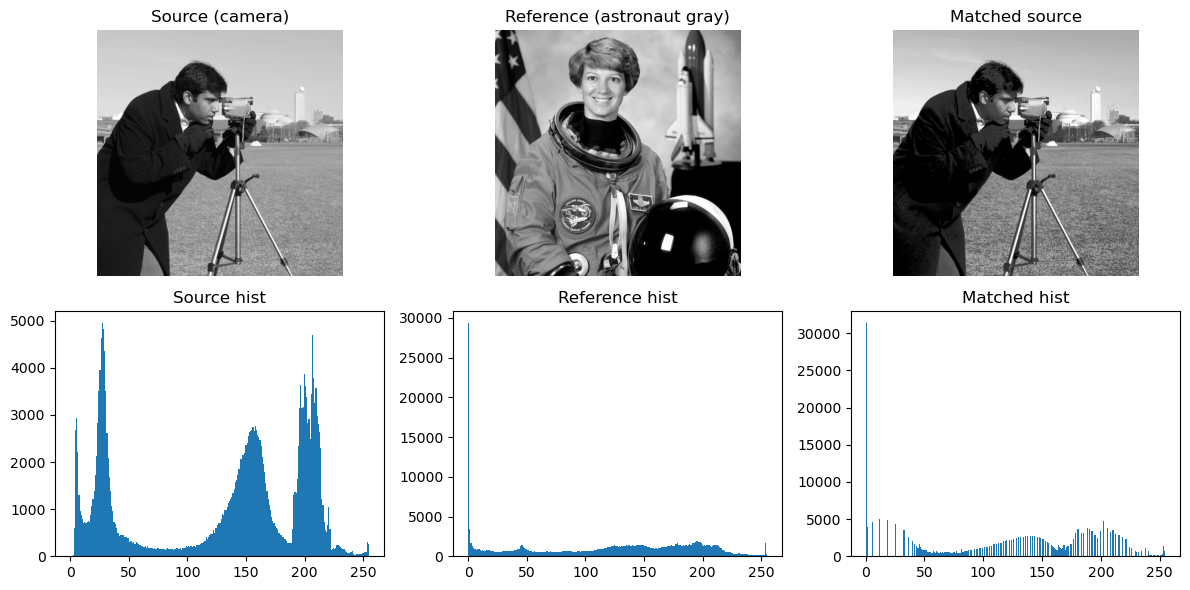

In [ ]:

# TODO: test your histogram matching function on two example images,
# and plot:
# - the original source and reference images,
# - the matched source image,
# - their histograms and/or CDFs.


### 5.4 CDF view of histogram matching

In [ ]:

# Plot CDFs before and after
hist_src_full, bins_src_full, cdf_src_full = compute_hist_cdf(gray_img)
hist_ref_full, bins_ref_full, cdf_ref_full = compute_hist_cdf(my_gray)
hist_match_full, bins_match_full, cdf_match_full = compute_hist_cdf(matched)

cent_src = 0.5 * (bins_src_full[:-1] + bins_src_full[1:])
cent_ref = 0.5 * (bins_ref_full[:-1] + bins_ref_full[1:])
cent_match = 0.5 * (bins_match_full[:-1] + bins_match_full[1:])

plt.figure(figsize=(6,4))
plt.plot(cent_src, cdf_src_full, label='Source CDF')
plt.plot(cent_ref, cdf_ref_full, label='Reference CDF')
plt.plot(cent_match, cdf_match_full, label='Matched CDF', linestyle='--')
plt.xlabel("Intensity")
plt.ylabel("CDF")
plt.title("CDFs: source vs reference vs matched")
plt.legend()
plt.grid(True)
plt.tight_layout()
